# CREDIT CARD FRUAD DETECTION PROJECT

## 1. Problem Statement & Goals

Credit card fraud causes major financial losses for banks and customers. The goal of this project is to build machine learning models that can predict whether a transaction is fraudulent or legitimate using historical transaction data. We will compare three models (Logistic Regression, Support Vector Machine, and Random Forest) and evaluate them using accuracy, precision, recall, F1-score, and AUC on an imbalanced Kaggle dataset.


## Importing lib & laoding the data

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sns.set(style="whitegrid")


df = pd.read_csv(r"E:\predict analy\creditcard.csv\creditcard.csv")

# basic info
print(df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

## 3. Exploratory Data Analysis (EDA)

### 3.1 Target variable (Class)

We first check how many normal vs. fraudulent transactions are in the dataset and visualize the imbalance.


In [10]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


# Plotting charts for visual

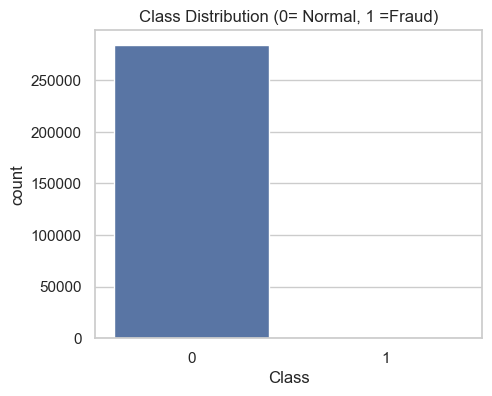

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x='Class',data=df)
plt.title('Class Distribution (0= Normal, 1 =Fraud)')
plt.show()

### 3.2 Transaction Amount distribution
We check how transaction amounts are spread and if there are many small or large payments.


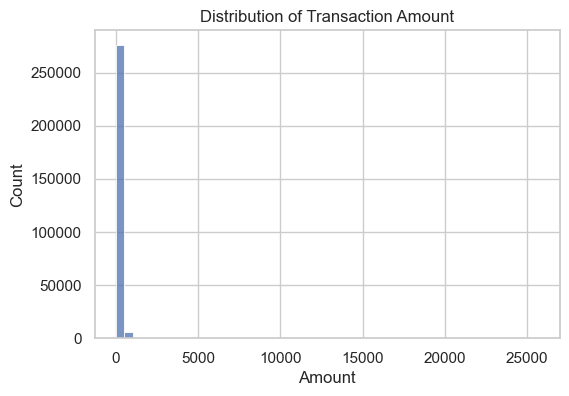

In [17]:
plt.figure(figsize=(6,4))              # create a 6x4 size plot
sns.histplot(df['Amount'], bins=50, kde=False)  # draw histogram of Amount
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()


## what we analysis with that is 
most transactions are for small amounts, and only a few are very large, which is why everything is crowded near 0 on the x‑axis.

# 4 Selecting features and target

We use all V1–V28, Time and Amount as input features (X) and Class as the target (y).


In [19]:
X=df.drop('Class',axis=1)
y=df['Class']

print("X shape",X.shape)
print("y shape",y.shape)

X shape (284807, 30)
y shape (284807,)


### 4.2 Train-test split

We split the data into training and testing sets so we can evaluate how well the model generalizes.


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (227845, 30) (227845,)
Test shape: (56962, 30) (56962,)


### 4.3 Feature scaling

We standardize the features so that each has mean 0 and standard deviation 1.


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Before scaling:", X_train.iloc[0, :5])   # first 5 features of one row
print("After scaling:", X_train_scaled[0, :5])  # same row after scaling


Before scaling: Time    161919.000000
V1           1.946747
V2          -0.752526
V3          -1.355130
V4          -0.661630
Name: 265518, dtype: float64
After scaling: [ 1.41158751  0.99337908 -0.45603659 -0.89405156 -0.46728372]


## 5. Model Training

### 5.1 Logistic Regression
We start with a simple baseline model: Logistic Regression.


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,y_train)


LogisticRegression(max_iter=1000)

In [32]:
y_pred=model.predict(X_test_scaled)


### 6 Evaluation of Logistic Regression

We evaluate the model using accuracy, precision, recall, F1-score and the confusion matrix.


In [38]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


print("Accuracy:",accuracy_score(y_test,y_pred))
print("precision:",precision_score(y_test, y_pred,zero_division=0))
print("Recall  :",recall_score(y_test, y_pred, zero_division=0))
print("F1 score :",f1_score(y_test, y_pred, zero_division=0))
print("confusion martrix:")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9991397773954567
precision: 0.8266666666666667
Recall  : 0.6326530612244898
F1 score : 0.7167630057803468
confusion martrix:
[[56851    13]
 [   36    62]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



### 6.1 Logistic Regression Results

The logistic regression model achieves 99.91% accuracy on the test set. However, due to the strong class imbalance, accuracy alone is misleading. The model detects fraudulent transactions with a precision of 0.83 and a recall of 0.63 (F1-score ≈ 0.72), correctly identifying 62 out of 98 fraud cases while missing 36 frauds. The confusion matrix shows 56,851 true negatives, 13 false positives, 36 false negatives and 62 true positives.


# Random Forest Classifier

We train a Random Forest model to see if we can detect more fraud cases than logistic regression.


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,      
    random_state=42,
    n_jobs=-1,            
    class_weight='balanced' 
)

rf_model.fit(X_train, y_train)       
y_pred_rf = rf_model.predict(X_test)


In [41]:
print("Random Forest Results")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_rf, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_rf, zero_division=0))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Results
Accuracy : 0.9995084442259752
Precision: 0.9605263157894737
Recall   : 0.7448979591836735
F1-score : 0.8390804597701149

Confusion Matrix:
[[56861     3]
 [   25    73]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



## Random Forest Results

The Random Forest classifier achieves 99.95% accuracy on the test data. Compared to logistic regression, it greatly improves fraud (class 1) detection: precision increases from 0.83 to 0.96 and recall from 0.63 to 0.74 (F1-score from 0.72 to 0.84). The confusion matrix shows that the model correctly identifies 73 fraudulent transactions (vs. 62 before), while reducing false alarms from 13 to only 3.










# Support Vector Machine (SVM)

We train an SVM classifier on the scaled features to compare its performance with logistic regression and random forest.


In [42]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',       
    C=1.0,              
    class_weight='balanced', 
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)      
y_pred_svm = svm_model.predict(X_test_scaled)  

In [43]:
print("SVM Results")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_svm, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_svm, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))


SVM Results
Accuracy : 0.9968399985955549
Precision: 0.3217391304347826
Recall   : 0.7551020408163265
F1-score : 0.45121951219512196

Confusion Matrix:
[[56708   156]
 [   24    74]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.32      0.76      0.45        98

    accuracy                           1.00     56962
   macro avg       0.66      0.88      0.72     56962
weighted avg       1.00      1.00      1.00     56962



###  SVM Results

The SVM model achieves high overall accuracy (99.68%) but performs poorly on the fraud class: precision drops to only 0.32, meaning that most predicted frauds are actually normal transactions. Although recall (0.76) is slightly higher than random forest, the large number of false positives (156 vs. 3) makes SVM less practical for real-world fraud detection.


# Model Comparison

| Model               | Accuracy | Precision (fraud=1) | Recall (fraud=1) | F1-score (fraud=1) |
|---------------------|----------|----------------------|-------------------|---------------------|
| Logistic Regression | 0.9991   | 0.83                 | 0.63              | 0.72                |
| Random Forest       | 0.9995   | 0.96                 | 0.74              | 0.84                |
| SVM                 | 0.9968   | 0.32                 | 0.76              | 0.45                |


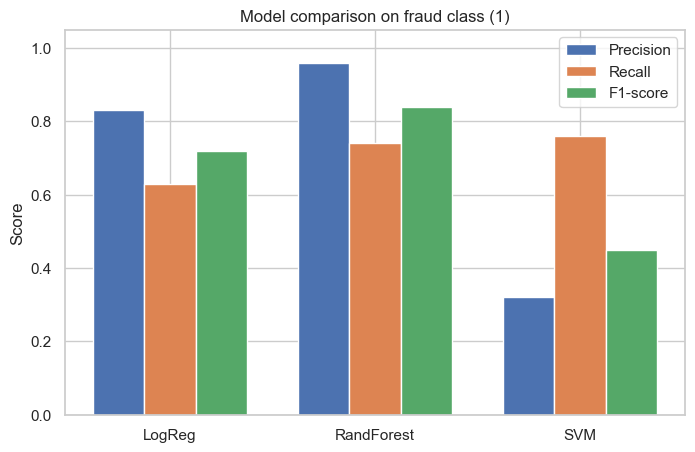

In [46]:
import numpy as np
import matplotlib.pyplot as plt

models = ['LogReg', 'RandForest', 'SVM']

precision = [0.83, 0.96, 0.32]
recall    = [0.63, 0.74, 0.76]
f1        = [0.72, 0.84, 0.45]

x = np.arange(len(models))  # [0,1,2]
width = 0.25                # bar ki chaurai

plt.figure(figsize=(8,5))

plt.bar(x - width, precision, width, label='Precision')
plt.bar(x,         recall,    width, label='Recall')
plt.bar(x + width, f1,        width, label='F1-score')

plt.xticks(x, models)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Model comparison on fraud class (1)')
plt.legend()
plt.show()


# Conclusion

### Random Forest outperforms logistic regression and SVM on the fraudulent class, achieving the best balance of precision (≈0.96) and recall (≈0.74). In a real banking scenario, this model would generate very few false alerts while catching most fraud cases, so we select it as the final model.


In [48]:
import joblib

joblib.dump(rf_model, "rf_fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']